In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import xarray as xr
from glob import glob

/home/apbarret/builds/anaconda/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [3]:
fileList = glob('/disks/arctic5_raid/abarrett/CFSR/T/1979/??/CFSR.flxf06.gdas.T.1979????.nc')
ds = xr.open_mfdataset(fileList, concat_dim='time')
ds

<xarray.Dataset>
Dimensions:   (lat_0: 361, lon_0: 720, lv_ISBL0: 6, time: 365)
Coordinates:
  * lv_ISBL0  (lv_ISBL0) float32 30000.0 50000.0 70000.0 85000.0 92500.0 ...
  * lat_0     (lat_0) float32 90.0 89.5 89.0 88.5 88.0 87.5 87.0 86.5 86.0 ...
  * lon_0     (lon_0) float32 0.0 0.5 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 ...
Dimensions without coordinates: time
Data variables:
    T         (time, lv_ISBL0, lat_0, lon_0) float64 215.8 215.8 215.8 215.8 ...

In [4]:
import datetime as dt
time = [dt.datetime.strptime(f.split('.')[4],'%Y%m%d') for f in fileList]

In [5]:
latwgt = np.cos(ds['lat_0'].where(ds['lat_0'] > 80.) * np.pi/180.)
lonwgt = xr.DataArray(np.ones(ds['lon_0'].size), [ds.coords['lon_0']])
weight = (latwgt * lonwgt) / (latwgt*lonwgt).sum()

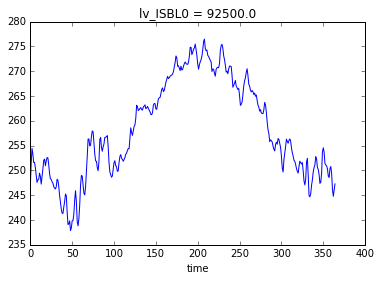

In [6]:
t_arctic = (ds['T'][:,4,:,:] * weight).sum(dim=['lat_0','lon_0'])
t_arctic.plot()

In [25]:
t_arctic['time']=time
t_arctic

<xarray.DataArray (time: 365)>
dask.array<p_reduc..., shape=(365,), dtype=float64, chunksize=(1,)>
Coordinates:
    lv_ISBL0  float32 92500.0
  * time      (time) datetime64[ns] 1979-01-01 1979-01-02 1979-01-03 ...

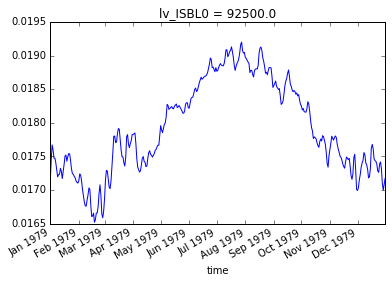

In [26]:
t_arctic.plot()

In [27]:
t_arctic.to_netcdf('~/data/arctic_temperature/t925_no80_avg.nc')

In [28]:
t_arctic.name = 'T925'

In [31]:
t_arctic['time'].attrs = {'units': 'days since 1900-01-01 00:00:00'}
t_arctic

<xarray.DataArray 'T925' (time: 365)>
dask.array<p_reduc..., shape=(365,), dtype=float64, chunksize=(1,)>
Coordinates:
    lv_ISBL0  float32 92500.0
  * time      (time) datetime64[ns] 1979-01-01 1979-01-02 1979-01-03 ...

In [32]:
t_arctic.to_netcdf('~/data/arctic_temperature/t925_no80_avg.nc')

ValueError: Failed hard to prevent overwriting key 'units'